# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Module 1 - Intro to Python/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#return the last 15 rows
df.tail(15)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1883,1476748,109906,The Meatball Shop,American,9.27,Weekend,Not given,24,23
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5,21,26
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Use shape to get the count of rows & columns
df.shape

(1898, 9)

#### Observations:
There are 1,898 rows & 9 columns in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 4 columns with type int64, 4 columns with type object or string, and 1 column with type float.

Rating should likely be a numerical value but based on the header above, it looks like 'Not given' values are causing it to be interpreted as a string. We should change those to NaN (in question 3 below).

We should also change order_id & customer_id from integers to strings so that we can get unique counts.

In [ ]:
# changing the order_id data type from int to string
df['order_id'] = df['order_id'].astype(str)

# check the order_id column type to make sure it changed
df['order_id'].dtype

dtype('O')

In [ ]:
# changing the customer_id data type from int to string
df['customer_id'] = df['customer_id'].astype(str)

# check the customer_id column type to make sure it changed
df['customer_id'].dtype

dtype('O')

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# double check for null values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# understand all of the unique values given for rating to make sure there are no other strings
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# replace 'Not given' with NaN
df['rating'] = df['rating'].replace(['Not given'],np.nan)

# changing the data type from string to float
df['rating'] = df['rating'].astype(float)

In [ ]:
# check the rating column type to make sure it changed
df['rating'].dtype

dtype('float64')

In [ ]:
# re-run unique values for rating to see if NaN is now represented
df['rating'].unique()

array([nan,  5.,  3.,  4.])

#### Observations:
As seen in the info above, all columns had 1,898 non-null values, so we could assume that there are no null values. However, in the header, we saw that rating has values of 'Not given'. We confirmed this by running another check to count the nulls. We changed this to NaN and changeed the column type to float so that we can get values like average, median, etc.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# described all data to get unique, top, & frequent values as well
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898,1898,1477147,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,1898,1200,52832,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations: The minimum time it took for an order to be prepared once an order is placed is 20 minutes. The maximum time it took for an order to be prepared was 35 minutes. The average time it wook for an order to be prepared was ~27 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# count the number of nulls in the rating column to see how many orders were not rated
df['rating'].isna().sum()

736

#### Observations: There are 736 orders out of the 1898 total orders, or ~39%, that do not have a rating.




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

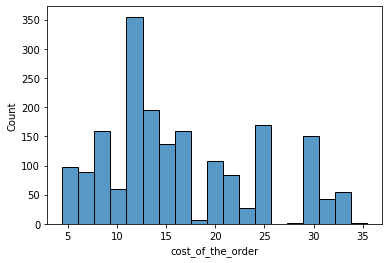

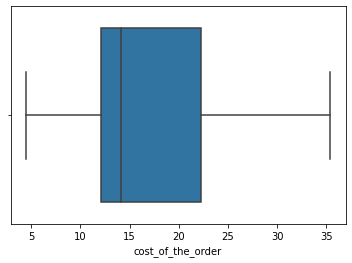

In [ ]:
# using histograms & box plots to visualize the numerical variables first
# order costs
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

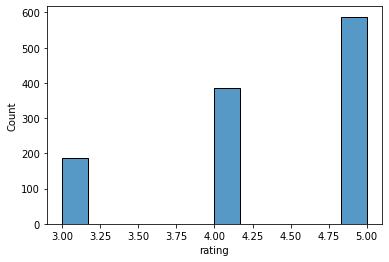

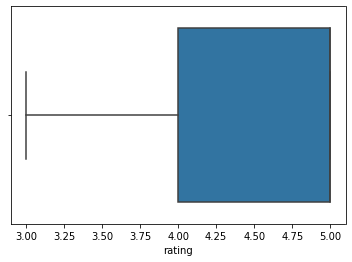

In [ ]:
# ratings
sns.histplot(data=df, x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()

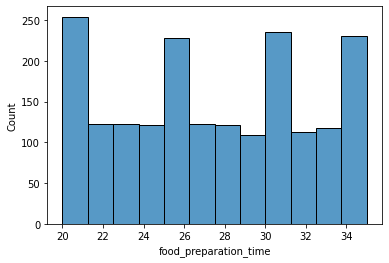

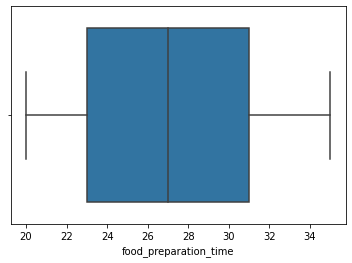

In [ ]:
# food preparation time
sns.histplot(data=df, x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

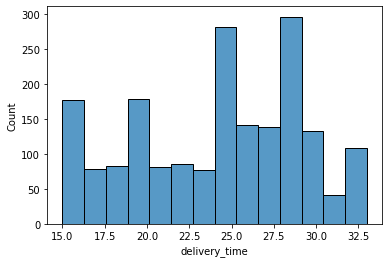

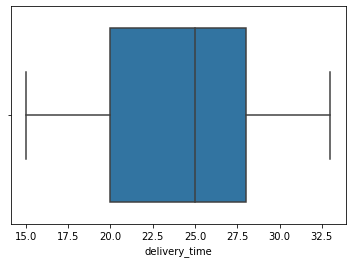

In [ ]:
# delivery time
sns.histplot(data=df, x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

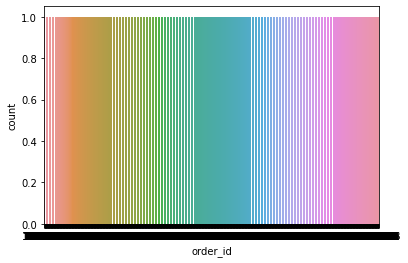

In [ ]:
# now using countplots or bar graphs to visualize the categorical variables
# countplot to visualize the frequency of order id (even though each order_id should be a unique value used as an index, we can still plot it to verify there are no issues with the data)
sns.countplot(data=df, x='order_id');

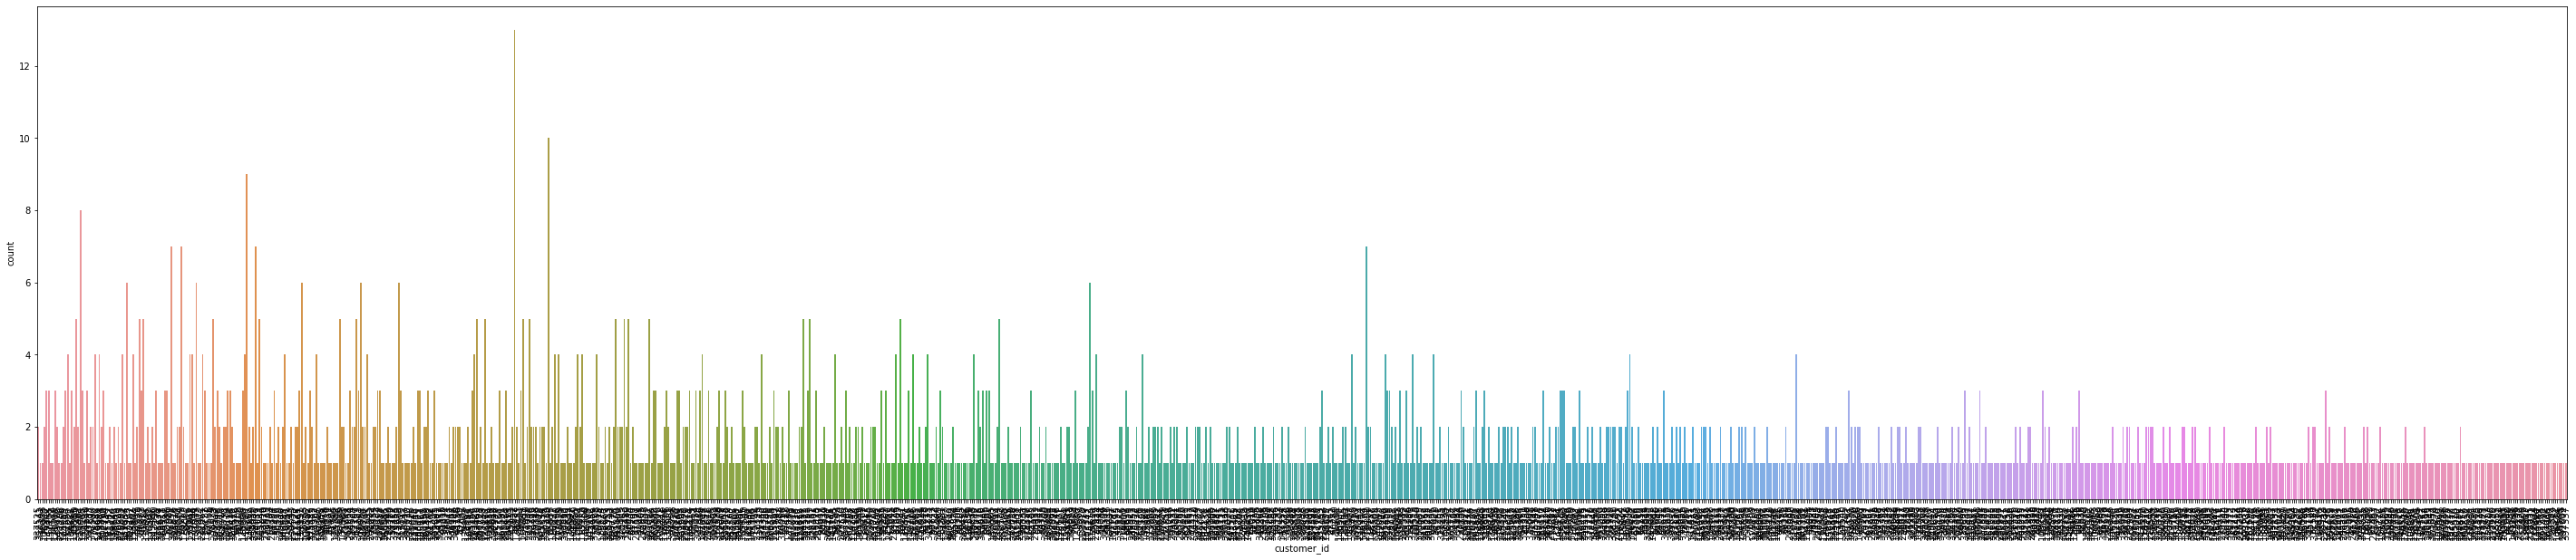

In [ ]:
# countplot to visualize the frequency of customer id
plt.figure(figsize=(50,10))
sns.countplot(data=df, x='customer_id')
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


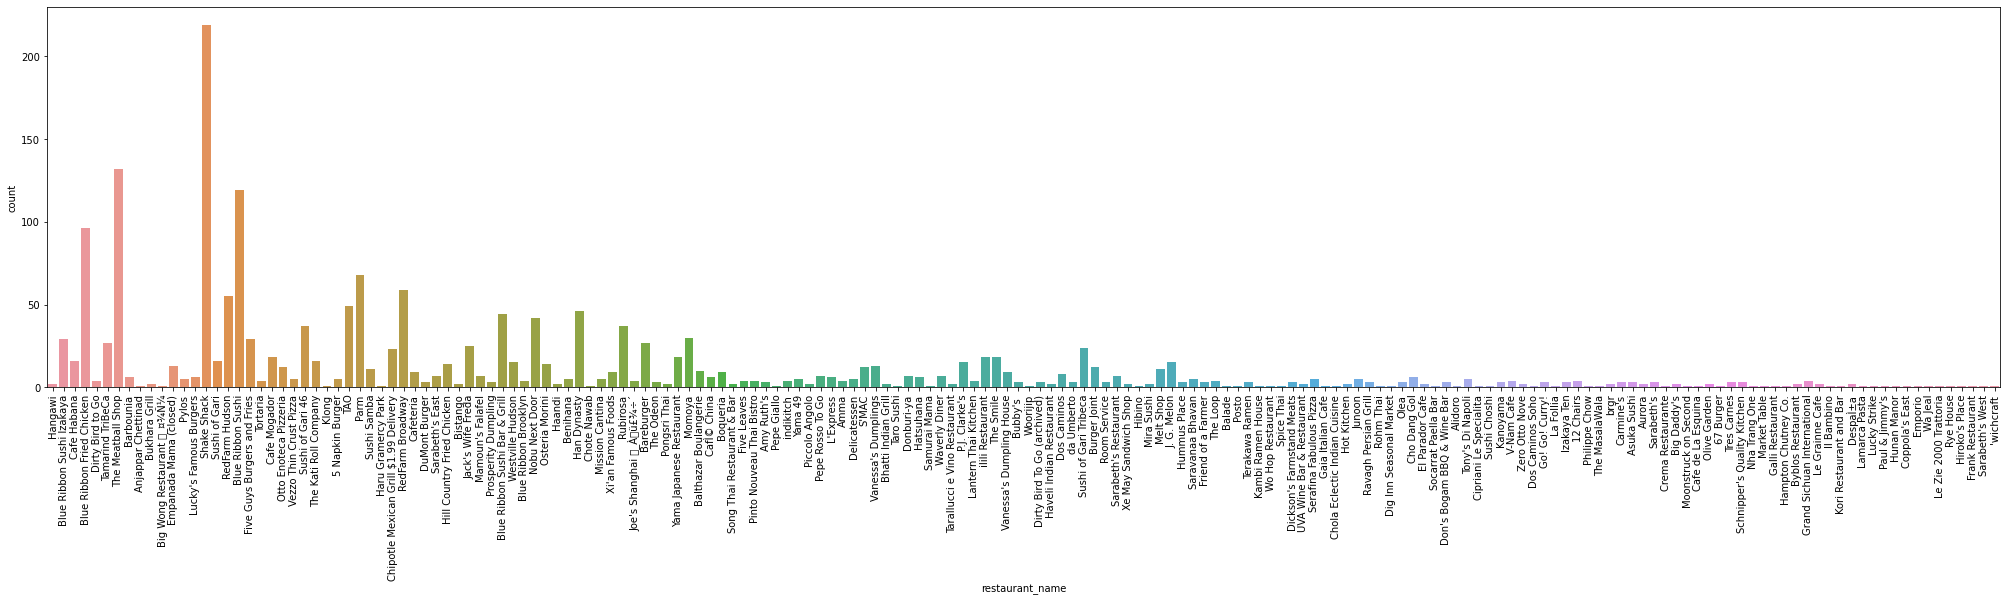

In [ ]:
# countplot to visualize the frequency of restaurant name
plt.figure(figsize=(35,7))
sns.countplot(data=df, x='restaurant_name')
plt.xticks(rotation=90);

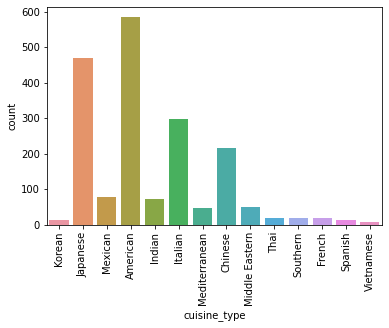

In [ ]:
# countplot to visualize the frequency of cuisine type
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90);

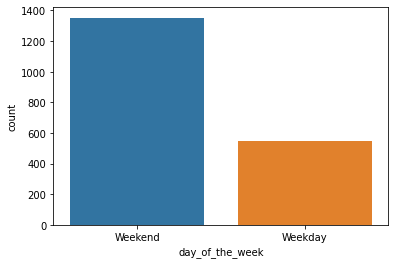

In [ ]:
# countplot to visualize the frequency of day of the week
sns.countplot(data=df,x='day_of_the_week');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# using group by to get the top 5 order counts by restaurant
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations: Shake Shack had 219 orders, which was the most of all restaurants by far. Parm rounded out the top 5 with 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# group by day of week and then cuisine type to get counts of orders
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations: American cuisine is the most popular on weekends (and weekdays too), followed by Japanese, and then Italian. 


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# find the number of orders costing more than $20
orders_over_20 = df[df['cost_of_the_order']>20].shape[0]
# find the number of total orders
total_orders = df.shape[0]
# return the percent of total orders
orders_over_20 / total_orders

0.2924130663856691

#### Observations: 555 orders cost more than 20 dollars, or 29% of the 1898 total orders.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# use mean to find the avg delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations: The mean delivery time for an order is ~24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# using group by to get the 3 customers with the most orders placed
df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64

#### Observations: Customer with the ID of 52832 placed 13 orders, which was the most of anyone. Customer with the ID of 47440 10 orders, the second most. And customer with the ID of 83287 placed 9 orders, which was the third most. 


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


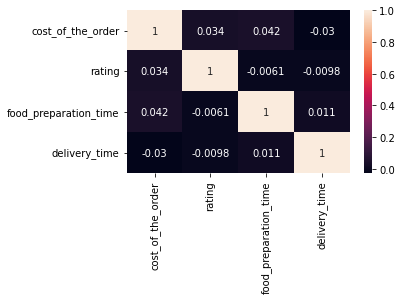

In [ ]:
# use a heatmap to see if there is correlation between the numerical variables
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True)
plt.show()

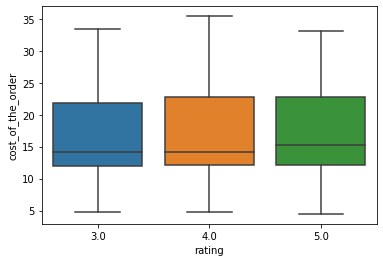

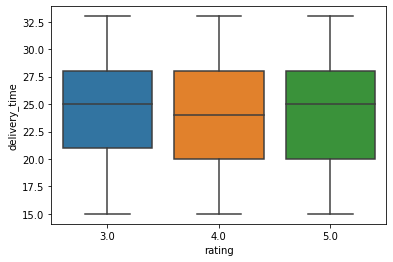

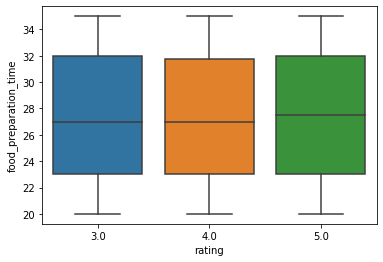

In [ ]:
#further exploring the correlation between rating and other variables
sns.boxplot(data=df,x='rating',y='cost_of_the_order')
plt.show()

sns.boxplot(data=df,x='rating',y='delivery_time')
plt.show()

sns.boxplot(data=df,x='rating',y='food_preparation_time')
plt.show()

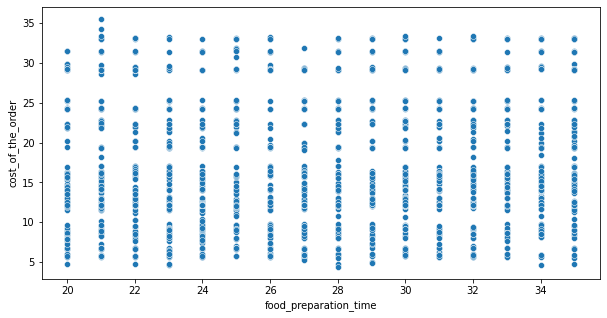

In [ ]:
# further exploring the correlation between order cost & food preparation time
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='food_preparation_time',y='cost_of_the_order')
plt.show()

In [ ]:
# creating a new column to calculate the total order time
df['total_order_time'] = df['food_preparation_time'] + df['delivery_time']
# checking that it was added to the df
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_order_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


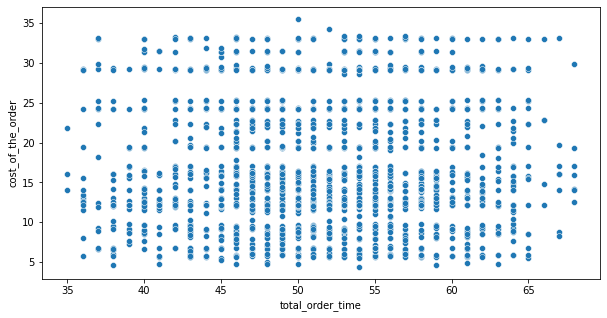

In [ ]:
# check that against order cost
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='total_order_time',y='cost_of_the_order')
plt.show()

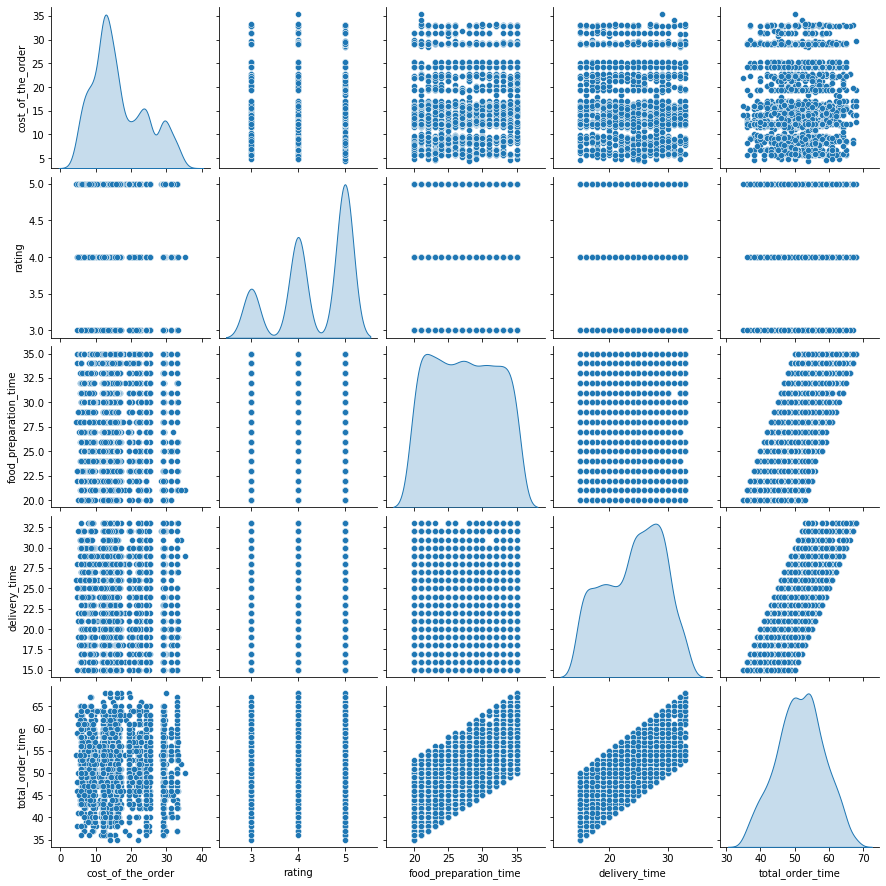

In [ ]:
# pairplot to further check for correlation
sns.pairplot(data=df, diag_kind="kde")
plt.show()

Looks like there really isn't a strong correlation between any of the numerical variables, other than the ones we know are correlated like total order time with delivery and food prep time, so let's add in categorical variables.

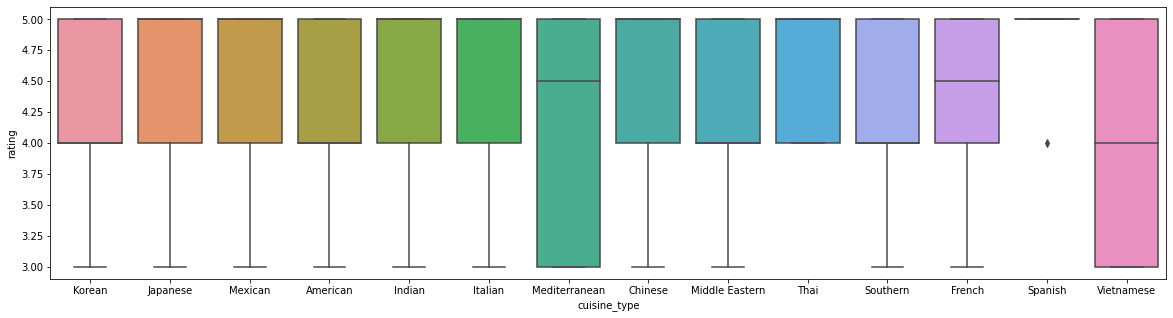

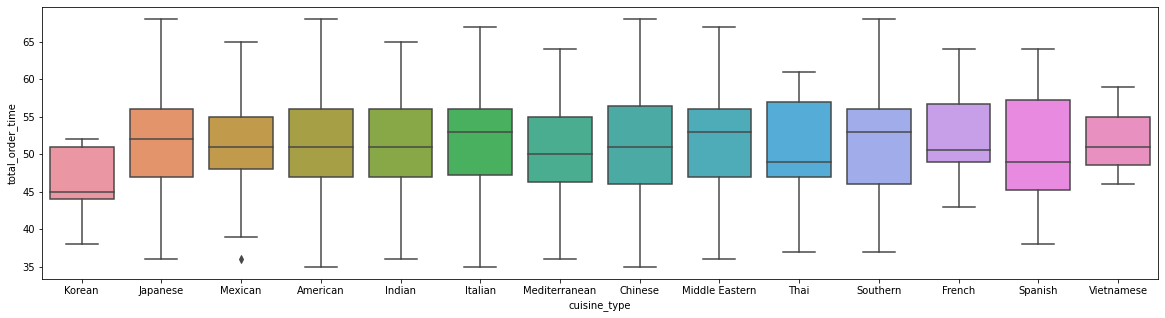

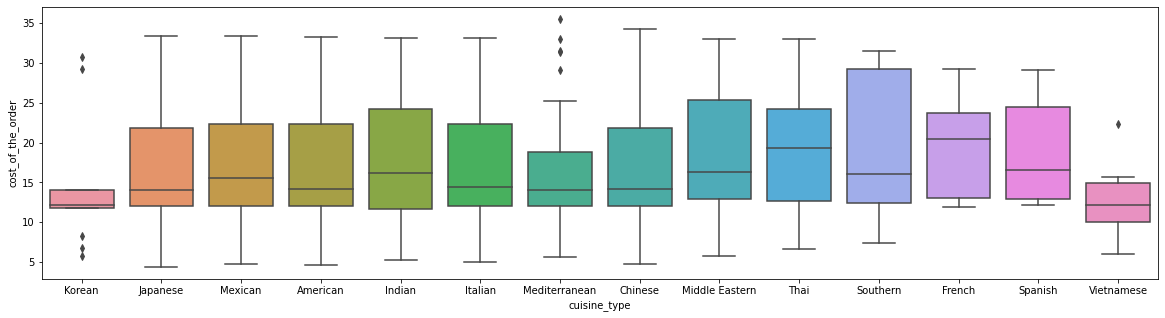

In [ ]:
# exploring cuisine type and other variables
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x='cuisine_type',y='rating')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df,x='cuisine_type',y='total_order_time')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.show()

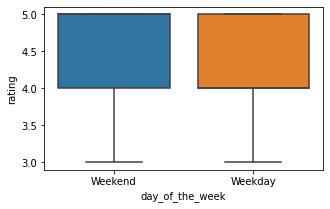

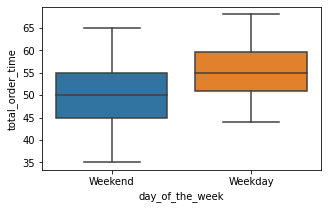

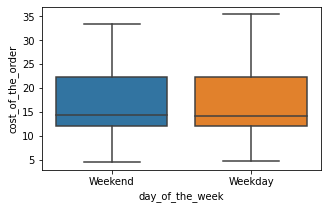

In [ ]:
# exploring day of the week and other variables
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x='day_of_the_week',y='rating')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=df,x='day_of_the_week',y='total_order_time')
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.show()

It seems like orders on weekdays take longer on average compared to orders on the weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# group by restaurant and get ratings count and average rating
rating_df = df.groupby(['restaurant_name']).agg(rating_count= ('rating', 'count'), rating_avg = ('rating', 'mean'))
# filter only rating count over 50 and avg rating over 4
rating_df = rating_df[(rating_df["rating_count"] > 50) & (rating_df["rating_avg"] > 4)]
# return results
rating_df

,rating_count,rating_avg
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations: There were only 4 restaurants with more than 50 ratings, and all 4 of them had an avg rating higher than 4.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# get rows with order cost over $20
cost_over_20 = df[(df['cost_of_the_order']>20)]
# get total cost for orders over $20
sum_cost = cost_over_20['cost_of_the_order'].sum()
# get revenue for order cost over $20
net_rev_over_20 = sum_cost*.25

# get rows with order cost over $5 but less than or equal to $20
cost_over_5 = df[(df['cost_of_the_order']>5)& (df['cost_of_the_order']<=20)]
# get total cost for orders over $5
sum_cost = cost_over_5['cost_of_the_order'].sum()
# get revenue for order cost over $5
net_rev_over_5 = sum_cost*.15

# return results
net_rev_over_20 + net_rev_over_5

6166.303

#### Observations: The net revenue generated by the company across all orders is $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# get count of orders > 60 min
count_orders_over_60_min = df[df['total_order_time'] >60].shape[0]
# get count of total orders
total_orders = df.shape[0]
# get percentage of orders > 60 min
count_orders_over_60_min / total_orders

0.1053740779768177

#### Observations: ~10.5% of orders took over 60 minutes from when the order was placed to when it was received.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# groupby day of week to get avg delivery time
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations: Orders on weekends are delivered much faster, at an average of ~22 minutes versus the ~28 minutes it takes on weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [ ]:
# understand the number of restaurants available for each cuisine type
df.groupby(['cuisine_type'])['restaurant_name'].nunique().sort_values(ascending=False)

cuisine_type
American          41
Italian           31
Japanese          29
Chinese           16
Indian            14
Mexican           11
Thai               9
Middle Eastern     7
Korean             5
Mediterranean      5
French             3
Spanish            3
Vietnamese         3
Southern           2
Name: restaurant_name, dtype: int64

In [ ]:
# understand the avg rating for each cuisine type
df.groupby(['cuisine_type'])['rating'].mean().sort_values(ascending=False)

cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64

### Conclusions:
*  There are less than 10 restaurant choices for 8 of the 14 cuisine types.
*  Spanish, Thai, & Indian cuisines have the highest avg ratings.



### Recommendations:

*  Since they have high average ratings, I would recommend that they encourage more Spanish & Thai restaurants to onboard to the app so that people have more restaurant choices in those cuisine types.

---

In [ ]:
# convert to html
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/PYF_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1400948 bytes to /content/drive/MyDrive/Colab Notebooks/PYF_Project_LearnerNotebook_FullCode.html
